In [335]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")

# Coleta de Dados

In [336]:
clientes = pd.read_csv('olist_customers_dataset.csv')
localizacao =  pd.read_csv('olist_geolocation_dataset.csv')
itens_pedidos =  pd.read_csv('olist_order_items_dataset.csv')
pagamentos =  pd.read_csv('olist_order_payments_dataset.csv')
avaliacoes =  pd.read_csv('olist_order_reviews_dataset.csv')
dados_pedido =  pd.read_csv('olist_orders_dataset.csv')
produtos = pd.read_csv('olist_products_dataset.csv')
vendedores = pd.read_csv('olist_sellers_dataset.csv')
categoria_produto = pd.read_csv('product_category_name_translation.csv')

In [337]:
# Entendendo os tipos de conjunto de dados

dados = [clientes,localizacao,itens_pedidos, pagamentos, avaliacoes, dados_pedido, produtos,vendedores, categoria_produto]
titulos = ["clientes","localizacao","itens_pedidos", "pagamentos", "avaliacoes", "dados_pedido","produtos","vendedores","categoria_produto"]



df_info = pd.DataFrame({},)
df_info['dados']= titulos

df_info['numero_de_colunas']= [len(df.columns) for df in dados ]
df_info['nomes_colunas']= [', '.join(list(df.columns)) for df in dados] 
df_info['numero_de_linhas'] = [len(df) for df in dados]

df_info.style.background_gradient()

,dados,numero_de_colunas,nomes_colunas,numero_de_linhas
0,clientes,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,localizacao,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
2,itens_pedidos,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
3,pagamentos,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
4,avaliacoes,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
5,dados_pedido,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
6,produtos,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
7,vendedores,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
8,categoria_produto,2,"product_category_name, product_category_name_english",71


In [338]:
import requests
import json

In [339]:
# URL que contém os dados em Json
url = 'https://servicodados.ibge.gov.br/api/v1/localidades/distritos?orderBy=nome'
# Fazendo a requisição 
requisicao = requests.get(url)
regiao = requisicao.json()

# Criando o DataFrame onde iremos colocar as informações de UF e Região
ibge = pd.DataFrame(columns = ['UF', 'Regiao'])

# Colocando os dados em uma lista extraindo somente as informações que queremos
for i in range(len(regiao)):
    ibge.loc[i] = [regiao[i]['municipio']['microrregiao']['mesorregiao']['UF']['sigla']
                   , regiao[i]['municipio']['microrregiao']['mesorregiao']['UF']['regiao']['nome']]

ibge['UF'].unique()

array(['BA', 'MG', 'GO', 'PA', 'CE', 'PR', 'RJ', 'SC', 'PE', 'TO', 'RO',
       'MA', 'RN', 'PI', 'RS', 'ES', 'MT', 'AC', 'AM', 'SP', 'MS', 'PB',
       'AL', 'RR', 'SE', 'AP', 'DF'], dtype=object)

In [340]:
# Confirmando dados adquiridos
ibge.head()

,UF,Regiao
0,BA,Nordeste
1,MG,Sudeste
2,GO,Centro-Oeste
3,MG,Sudeste
4,GO,Centro-Oeste


In [341]:
# Retira os duplicados
df_regiao = ibge.drop_duplicates()
df_regiao.loc[df_regiao['UF'] == 'RJ']

,UF,Regiao
14,RJ,Sudeste


In [342]:
df_regiao.dtypes

UF        object
Regiao    object
dtype: object

# Processamento e Tratamento de Dados

In [343]:
avaliacoes.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [344]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [345]:
avaliacoes['review_id'].nunique()

98410

In [346]:
df = clientes.merge(right = dados_pedido, how = 'left', on = 'customer_id')
df = df.merge(right = pagamentos, on = 'order_id')
df = df.merge(right = itens_pedidos, on = 'order_id')
df = df.merge(right = produtos, on = 'product_id')
df = df.merge(right = avaliacoes, on = 'order_id')
df = df.merge(right = categoria_produto, on = 'product_category_name')

In [347]:
df.shape

(115609, 37)

In [348]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office_furniture


In [349]:
# Juntando o dataframe para contemplar a Região
df = pd.merge(
    left = df,
    right = df_regiao[['UF','Regiao']],
    left_on = 'customer_state',
    right_on = 'UF',
    how = 'inner'
)
df.drop(columns = ['UF'],inplace=True)

In [350]:
df.shape

(115609, 38)

In [351]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,Sudeste
1,8bf4f9552bc2db14d6195bbbb5131941,b428f59c73c1bbeb3584744b4570654b,3728,sao paulo,SP,7ebc5c60f532934ce55b3025203ebe5b,delivered,2017-06-24 08:59:47,2017-06-27 03:45:30,2017-06-29 17:37:56,...,64.0,31.0,dfe9b87eb34f2b54b85660e934b902a5,2,NaN,"PRODUTO ENTREGUE COM AVARIA, SOLICITADO TROCA.",2017-07-04 00:00:00,2017-07-07 09:19:01,office_furniture,Sudeste
2,9202f01b2ebd095e340abd57e02b65e6,7fcf7dc77013a88b9eef97c288b3eb8d,11701,praia grande,SP,4819cd593b17ce6f5757d395b2597a9d,delivered,2017-06-02 11:06:09,2017-06-02 11:23:00,2017-06-08 14:58:56,...,64.0,31.0,26b9eacfc049f843e99d3c87eaf380de,4,NaN,NaN,2017-06-15 00:00:00,2017-06-19 23:28:15,office_furniture,Sudeste
3,15359860c7341b2f6b12259d83c2e697,52d8a619dff23c2985434b25e9862ff8,18609,botucatu,SP,cec04b13070b06e2f7326de94287d60d,delivered,2017-04-24 12:16:12,2017-04-25 06:35:40,2017-05-15 15:45:56,...,64.0,31.0,021e3fe507d74d579c4fc4f6f7bd05c1,4,NaN,NaN,2017-05-21 00:00:00,2017-05-23 13:00:56,office_furniture,Sudeste
4,645d4fd3f4546d7c9592576665711186,661ada8f1f0f348790c6b9ce57d51f55,17521,marilia,SP,6b5c76c2c9615b42e0c2b7efb11b60d7,delivered,2018-04-03 21:24:29,2018-04-03 21:35:21,2018-04-17 22:38:18,...,64.0,31.0,fbb7c08e8ca00f3412c095449c59d83b,3,NaN,"o produto chegou certinho, porém não veio os p...",2018-04-25 00:00:00,2018-04-25 18:17:53,office_furniture,Sudeste


In [352]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english', 'Regiao'],
      dtype='object')

In [353]:
# Colunas que não iremos utilizar
nao_uteis = ['customer_zip_code_prefix', 'order_approved_at', 'order_delivered_carrier_date', 'shipping_limit_date']
print('Número de colunas não úteis: ',len(nao_uteis))

Número de colunas não úteis:  4


In [354]:
df.drop(nao_uteis,axis=1,inplace=True)

In [355]:
df.dtypes

customer_id                       object
customer_unique_id                object
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_c

In [356]:
# Passando todas as colunas de data em formato objeto para timestamp
df[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date']]=df[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date']].apply(pd.to_datetime)

In [357]:
df[['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date']].dtypes

order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_creation_date             datetime64[ns]
dtype: object

# Tratando os duplicados

In [358]:
df.duplicated().value_counts()

False    115609
dtype: int64

In [359]:
print("Linhas antes de tirar as duplicadas:",len(df))
print("Colunas antes de tirar as duplicadas:",len(df.columns))

Linhas antes de tirar as duplicadas: 115609
Colunas antes de tirar as duplicadas: 34


In [360]:
duplicados = df[df.duplicated(['order_id','customer_id', 'review_id', 'review_creation_date', 'review_answer_timestamp', 
                               'order_purchase_timestamp', 'order_delivered_customer_date','customer_unique_id',
                               'review_comment_message'])]
duplicados.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao
9,a2a34d52a5ca3c214067d8d87f6ddf21,ca9522ba7a7c70fc06b2a82471681ce4,poa,SP,0ecd7312b4a222a3a86590e46f1c2b90,delivered,2017-07-26 20:50:09,2017-08-05 13:37:46,2017-08-14,1,...,64.0,31.0,f5eb643a65f9bbfaa614a8a03444d70d,4,NaN,Excelente,2017-08-06,2017-08-15 17:09:18,office_furniture,Sudeste
11,84716102ab4d906f65136c89fca3f0c3,1985ee4e25eee7fc657c6052e733c3d3,santos,SP,e48f28e15158bd10b02972eae44c8e7e,delivered,2017-05-09 12:33:38,2017-05-23 08:47:40,2017-05-25,1,...,64.0,31.0,ba2c96ccbecc0d2af672aac3bc3e10de,4,NaN,NaN,2017-05-24,2017-05-27 12:56:01,office_furniture,Sudeste
17,9db61f02788ba2a816117b4d7dc2d58b,71c98a01b26884386e5c68ac5b09054a,sao paulo,SP,665d84d48d4c7c497117465e6f02f92f,delivered,2018-07-10 09:13:20,2018-08-13 14:32:00,2018-08-03,1,...,51.0,28.0,31bccb8a92ef436bff3b116af68ca0f7,1,insatisfeita,ja passou o prazo de entrega e ainda nao receb...,2018-08-08,2018-08-08 16:33:34,office_furniture,Sudeste
20,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,2018-03-27 17:19:28,2018-04-12 19:23:05,2018-04-24,1,...,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,2018-04-13,2018-04-15 16:16:42,office_furniture,Sudeste
21,1be3aceab3595d6f6b923858d5b44edd,02ff3aee636a9ee1c1fef271daa0bc07,santos,SP,8b486b19bcb4db26c3e24a6e6d4e2e39,delivered,2018-03-27 17:19:28,2018-04-12 19:23:05,2018-04-24,1,...,58.0,24.0,03c0a0c8d0a0f176bc1f5ebe9ab2b01f,5,NaN,NaN,2018-04-13,2018-04-15 16:16:42,office_furniture,Sudeste


In [361]:
df= df.drop_duplicates(subset={'order_id','customer_id', 'review_id', 'review_creation_date', 'review_answer_timestamp',
                               'order_purchase_timestamp', 'order_delivered_customer_date','customer_unique_id',
                               'review_comment_message'}, 
                       keep='first', inplace=False)
df=df.reindex()
df.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05,1,...,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26,2017-05-30 22:34:40,office_furniture,Sudeste
1,8bf4f9552bc2db14d6195bbbb5131941,b428f59c73c1bbeb3584744b4570654b,sao paulo,SP,7ebc5c60f532934ce55b3025203ebe5b,delivered,2017-06-24 08:59:47,2017-07-03 14:27:59,2017-07-17,1,...,64.0,31.0,dfe9b87eb34f2b54b85660e934b902a5,2,NaN,"PRODUTO ENTREGUE COM AVARIA, SOLICITADO TROCA.",2017-07-04,2017-07-07 09:19:01,office_furniture,Sudeste
2,9202f01b2ebd095e340abd57e02b65e6,7fcf7dc77013a88b9eef97c288b3eb8d,praia grande,SP,4819cd593b17ce6f5757d395b2597a9d,delivered,2017-06-02 11:06:09,2017-06-14 15:35:06,2017-06-22,1,...,64.0,31.0,26b9eacfc049f843e99d3c87eaf380de,4,NaN,NaN,2017-06-15,2017-06-19 23:28:15,office_furniture,Sudeste
3,15359860c7341b2f6b12259d83c2e697,52d8a619dff23c2985434b25e9862ff8,botucatu,SP,cec04b13070b06e2f7326de94287d60d,delivered,2017-04-24 12:16:12,2017-05-22 17:36:55,2017-05-19,1,...,64.0,31.0,021e3fe507d74d579c4fc4f6f7bd05c1,4,NaN,NaN,2017-05-21,2017-05-23 13:00:56,office_furniture,Sudeste
4,645d4fd3f4546d7c9592576665711186,661ada8f1f0f348790c6b9ce57d51f55,marilia,SP,6b5c76c2c9615b42e0c2b7efb11b60d7,delivered,2018-04-03 21:24:29,2018-04-24 21:14:41,2018-04-27,1,...,64.0,31.0,fbb7c08e8ca00f3412c095449c59d83b,3,NaN,"o produto chegou certinho, porém não veio os p...",2018-04-25,2018-04-25 18:17:53,office_furniture,Sudeste


In [362]:
print("Linhas depois de tirar as duplicadas:",len(df))
print("Colunas depois de tirar as duplicadas:",len(df.columns))

Linhas depois de tirar as duplicadas: 97055
Colunas depois de tirar as duplicadas: 34


# Removendo os nulos

In [363]:
df.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_delivered_customer_date     2048
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                        0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     1
product_length_cm                    1
product_height_cm                    1
product_width_cm         

In [364]:
selecao = df.order_delivered_customer_date.isnull()
df[selecao]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao
205,2c572703cc177e9d9aeaeda37ee126a4,37199c7a9917cfe96ac736d221e3f5f1,sao paulo,SP,b37221105bacc5296a24e7b334498547,shipped,2018-02-06 17:41:41,NaT,2018-03-13,1,...,7.0,83.0,e5b61b3e529d0675caeacf4f1c8b9d89,3,NaN,NaN,2018-03-16,2018-03-18 09:05:59,office_furniture,Sudeste
289,00efb24cd00f8eda8e85e3c3e0f2eb66,927e342e5416289ef96f6097d6494235,jundiai,SP,660aaf581bff579657fa00152ba11a7a,shipped,2018-04-15 18:09:08,NaT,2018-05-07,1,...,47.0,33.0,9e2ec0c90fc3dd7f7a6ffc7691727944,4,NaN,NaN,2018-05-09,2018-05-10 23:19:13,office_furniture,Sudeste
296,d36226a75bd645b98eb282c9ac967eb2,33db96cdca5de6fcace0b3a7a0fb05c4,sao paulo,SP,e137acc00a73478b179ca50de0176bbb,invoiced,2018-07-18 15:28:39,NaT,2018-08-13,1,...,55.0,22.0,e6304e6e948027131babe780211868a7,1,Ainda estou esperando,"Preciso da cadeira, comprei e já faz mais de u...",2018-08-15,2018-08-15 11:24:03,office_furniture,Sudeste
358,89d9677d2a9750f861ab0e6ef48bf912,6461d480b751d08e42faaf99b59267aa,sao paulo,SP,a9bd89ff808222233c9bb5567f618e3f,invoiced,2018-01-12 21:17:40,NaT,2018-02-07,1,...,58.0,41.0,92135f15fd661296f9cfe6c0157a6caa,1,NaN,Não entregou e não entrou em contato,2018-02-11,2018-02-11 17:30:37,office_furniture,Sudeste
485,a0508b86d745112acd8e2ac4a1c3b02a,90a4155ff741f30c5321018d12d4b43e,sao paulo,SP,87b732d9778eda3d298cbd97c22aba48,invoiced,2018-03-09 12:08:02,NaT,2018-04-19,1,...,10.0,62.0,a91c97c8373175104990660345b87786,3,NaN,NaN,2018-04-22,2018-04-23 12:08:49,office_furniture,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115279,3c13585a5ac14038367b2a957ff22f4c,1893f08842b6068ae5206591158a8623,porto velho,RO,8d0fe5f8742be51a61db6ac620e4f032,processing,2017-10-16 11:43:58,NaT,2017-11-23,1,...,12.0,17.0,fea9cb96f01ec571eb21df48a44f7b28,1,NaN,"Péssimo, pois pedi um produto, ja paguei, dizi...",2017-11-26,2017-11-27 19:56:12,telephony,Norte
115337,b097036ec194b8151f619fe933161b3e,8ad3de005f848b9841cd3be326af3a7c,extrema,RO,8fb030b413de395dcbb7cb1a3c9b256e,processing,2017-02-12 00:02:36,NaT,2017-03-24,1,...,35.0,64.0,c3039a71818e8c4ebe2f1a905ab1f863,1,NaN,Demora muito e eles não dão satisfação pelo mo...,2017-03-26,2017-03-27 14:23:05,baby,Norte
115351,fac697cc750bbd1acf6dc02ccfd6adb7,357482c4e5b9b6200cc2b37b8a7b46b9,vilhena,RO,853eb57e7109781f60bfaec58c70c258,invoiced,2017-04-23 13:25:43,NaT,2017-05-26,1,...,2.0,11.0,aae8bb3315a74182831c7a0c0d3e0c23,2,NaN,NaN,2017-05-28,2017-05-28 15:55:44,watches_gifts,Norte
115451,ce11c5da877465175182c9082327755d,80a0fe15e25dd27bcf6f0d95755aada6,macapa,AP,2177c383835d2102aaffabf80638aa19,processing,2017-05-09 11:01:12,NaT,2017-06-14,1,...,10.0,15.0,e9c7b21eae49f95d880790cc9805bc68,1,NaN,Preciso de números telefones de contato com o ...,2017-06-18,2017-06-19 13:52:45,computers_accessories,Norte


In [365]:
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], 
                                                                                 inplace=False)

In [366]:
# Preenchendo colunas nulas com "sem_comentarios" apenas para não enviesar a análise geral 
df['review_comment_message'].fillna('sem_comentarios',inplace=True)
df['review_comment_title'].fillna('sem_titulo',inplace=True)

# Análise Exploratória

In [367]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english', 'Regiao'],
      dtype='object')

In [368]:
# Análise Geral
av_5s = len(df[df['review_score'] == 5]) * 100 / len(df)
av_1s = len(df[df['review_score'] == 1]) * 100 / len(df)
primeira_dt = df['review_creation_date'].min()
ultima_dt = df['review_creation_date'].max()
media_s = df['review_score'].mean()
print(len(df), 'Avaliações')
print('Primeira:', primeira_dt)
print('Última:', ultima_dt)
print(f'5★: {av_5s:.1f}%')
print(f'1★: {av_1s:.1f}%')
print(f'Média: {media_s:.1f}★')

97055 Avaliações
Primeira: 2016-10-15 00:00:00
Última: 2018-08-31 00:00:00
5★: 58.2%
1★: 11.0%
Média: 4.1★


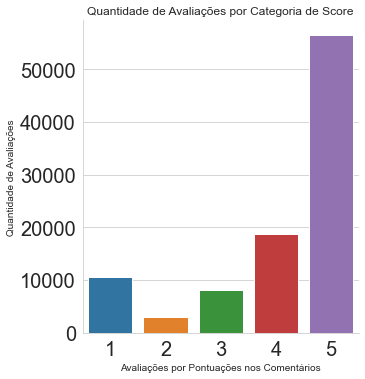

In [369]:
sns.catplot(
    x='review_score', 
    kind='count', 
    data=df
).set(
    xlabel='Avaliações por Pontuações nos Comentários', 
    ylabel='Quantidade de Avaliações'
)
plt.title('Quantidade de Avaliações por Categoria de Score')
plt.show()

In [370]:
# Considerando as avaliações em Positivas (>3) e Negativas (<3)
def partition(x):
    if x < 3:
        return 0
    return 1
df['review_score2']=df['review_score'].map(lambda rv : partition(rv) ) 
    
# Checando as avaliações com a nova divisão
df.review_score2.value_counts()

1    83348
0    13707
Name: review_score2, dtype: int64

In [371]:
df.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,review_score2
count,97055.000000,97055.000000,97055.00000,97055.000000,97055.000000,97055.000000,97055.000000,97055.000000,97055.000000,97054.000000,97054.000000,97054.000000,97054.000000,97055.000000,97055.000000
mean,1.022585,2.923466,157.77176,1.015981,125.635393,20.218412,48.850992,792.978486,2.247962,2105.500835,30.157685,16.502576,23.071156,4.106908,0.858771
std,0.248359,2.715210,216.41082,0.146754,189.239349,15.924128,9.995988,654.106828,1.744972,3763.716867,16.150863,13.339883,11.741791,1.329581,0.348260
min,1.000000,0.000000,0.01000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000
25%,1.000000,1.000000,60.01000,1.000000,41.800000,13.300000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,1.000000
50%,1.000000,2.000000,103.13000,1.000000,79.000000,16.390000,52.000000,605.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000,1.000000
75%,1.000000,4.000000,175.28500,1.000000,139.900000,21.260000,57.000000,995.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000,1.000000
max,27.000000,24.000000,13664.08000,9.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,1.000000


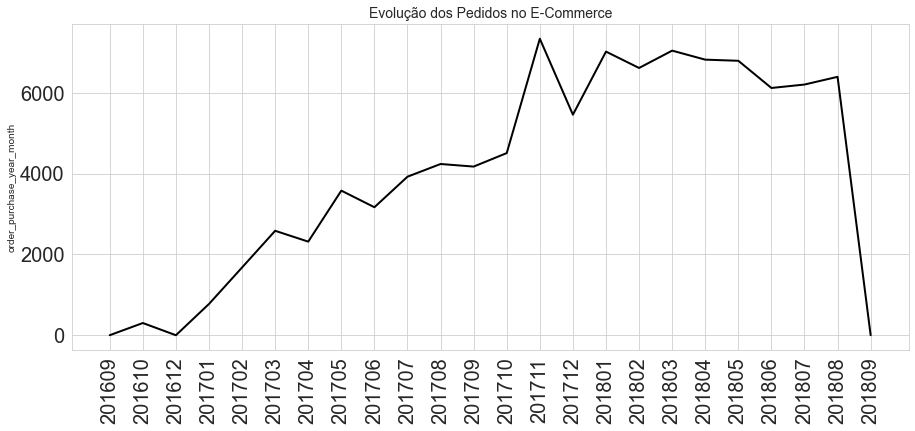

In [372]:
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
sns.lineplot(data=df['order_purchase_year_month'].value_counts().sort_index(), 
             color='black', linewidth=2)
plt.title('Evolução dos Pedidos no E-Commerce', size=14)
plt.xticks(rotation=90)
plt.show()

In [373]:
df["customer_state"].value_counts()

SP    40748
RJ    12487
MG    11366
RS     5370
PR     4921
SC     3540
BA     3293
DF     2104
ES     1991
GO     1962
PE     1624
CE     1305
PA      944
MT      888
MA      729
MS      709
PB      518
PI      482
RN      474
AL      408
SE      342
TO      274
RO      241
AM      145
AC       79
AP       67
RR       44
Name: customer_state, dtype: int64

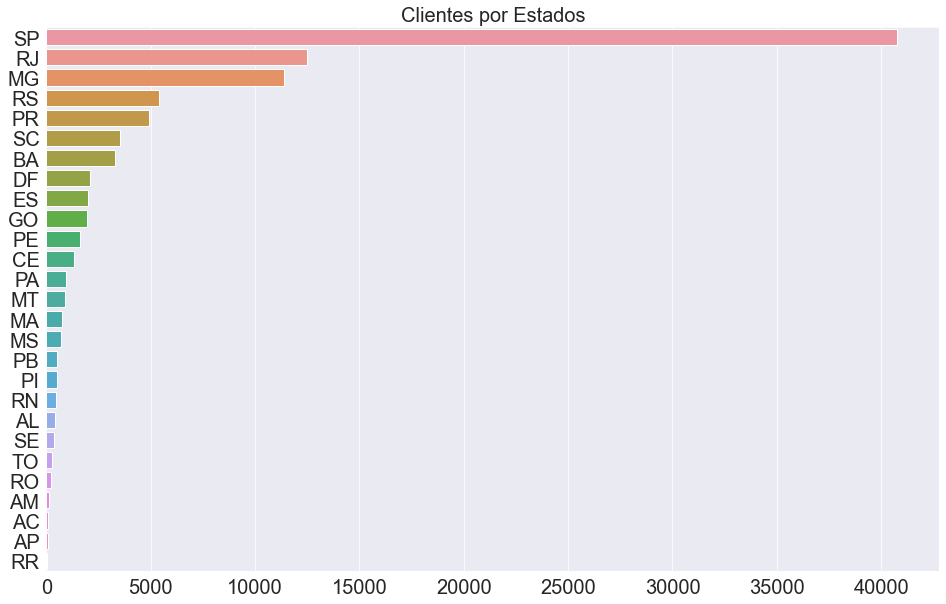

In [374]:
top_estados = df["customer_state"].value_counts()
fig=plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y=top_estados.index, x=top_estados.values)
plt.title('Clientes por Estados',fontsize=20)
plt.show()

In [375]:
# https://stackoverflow.com/a/51540521/4084039
temp = pd.DataFrame(df.groupby('customer_state')['review_score2'].agg(lambda x: x.eq(1).sum())).reset_index()

In [376]:
# https://stackoverflow.com/a/19385591/4084039
temp['total'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp['Avg']   = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp= temp.rename(columns={'review_score2':'positive_review'})
temp= temp.sort_values(by=['total'], ascending=False)

In [377]:
temp

,customer_state,positive_review,total,Avg
25,SP,35881,40748,4.199151
18,RJ,9963,12487,3.892929
10,MG,9910,11366,4.153352
22,RS,4677,5370,4.148976
17,PR,4334,4921,4.201788
23,SC,3041,3540,4.094633
4,BA,2684,3293,3.878227
6,DF,1796,2104,4.077471
7,ES,1703,1991,4.056755
8,GO,1682,1962,4.057085


In [378]:
#https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
# Função para plotar o grafico
def grafico_plot(data, xtick, col2, col3='total'):
    x = np.arange(data.shape[0])
    
    plt.figure(figsize=(25,10))
    p1 = plt.bar(x, data[col3].values,color = 'grey',alpha=0.5)
    p2 = plt.bar(x, data[col2].values,alpha=0.8)
    
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.ylabel('Avaliações', fontsize=14)
    plt.title('% Avaliações', fontsize=14)
    plt.xticks(x-0.1, list(data[xtick].values), rotation=0)
    plt.legend((p1[0], p2[0]), ('total_avaliacoes', 'avaliacoes_positivas'))
    plt.show()

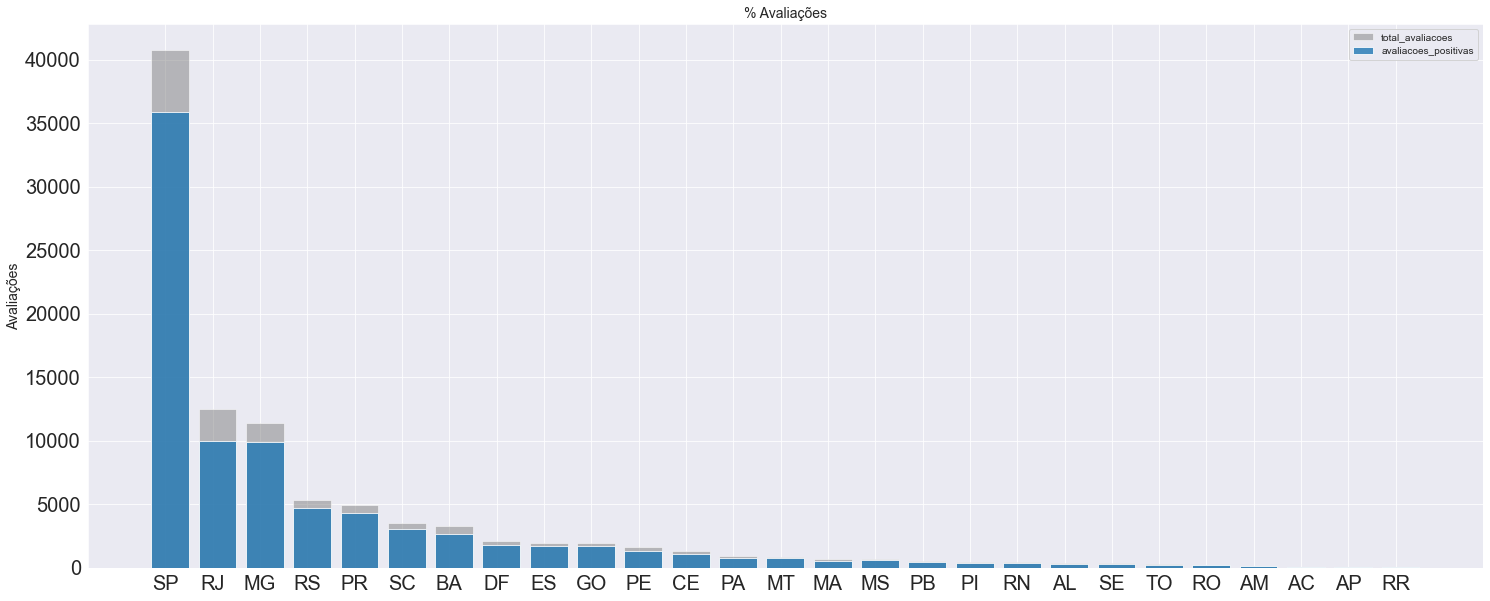

In [379]:
grafico_plot(temp,'customer_state',col2='positive_review', col3='total')

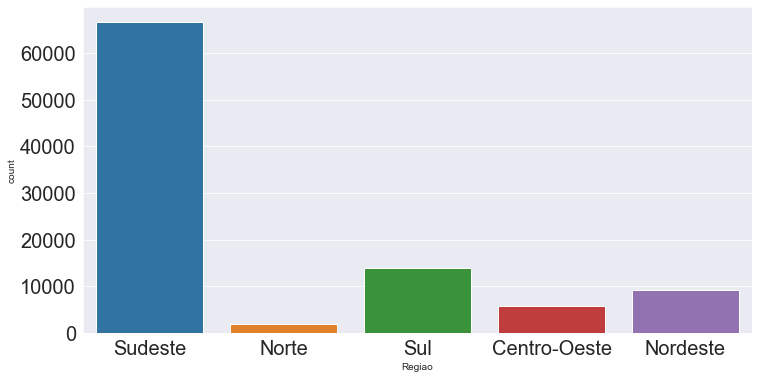

In [380]:
plt.figure(figsize=(12,6))
sns.countplot(df['Regiao'])
plt.show()

In [381]:
temp_regiao = pd.DataFrame(df.groupby('Regiao')['review_score2'].agg(lambda x: x.eq(1).sum())).reset_index()
temp_regiao['total'] = list(pd.DataFrame(df.groupby('Regiao')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_regiao['Avg']   = list(pd.DataFrame(df.groupby('Regiao')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_regiao= temp_regiao.rename(columns={'review_score2':'positive_review'})
temp_regiao= temp_regiao.sort_values(by=['total'], ascending=False)

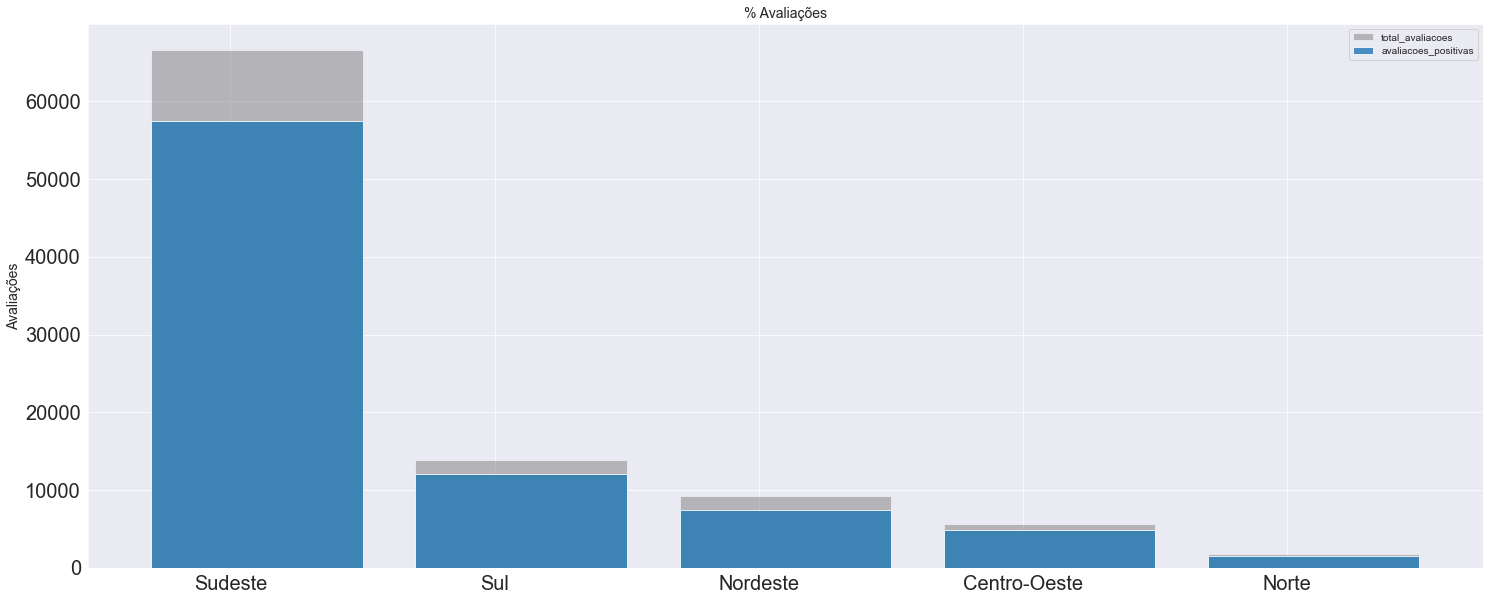

In [382]:
grafico_plot(temp_regiao,'Regiao',col2='positive_review', col3='total')

In [383]:
colunas_numericas = ['review_score', 'payment_sequential', 'payment_installments',
                   'payment_value', 'price', 'freight_value', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']
df_numericas = df[colunas_numericas]
corr = df_numericas.corr()

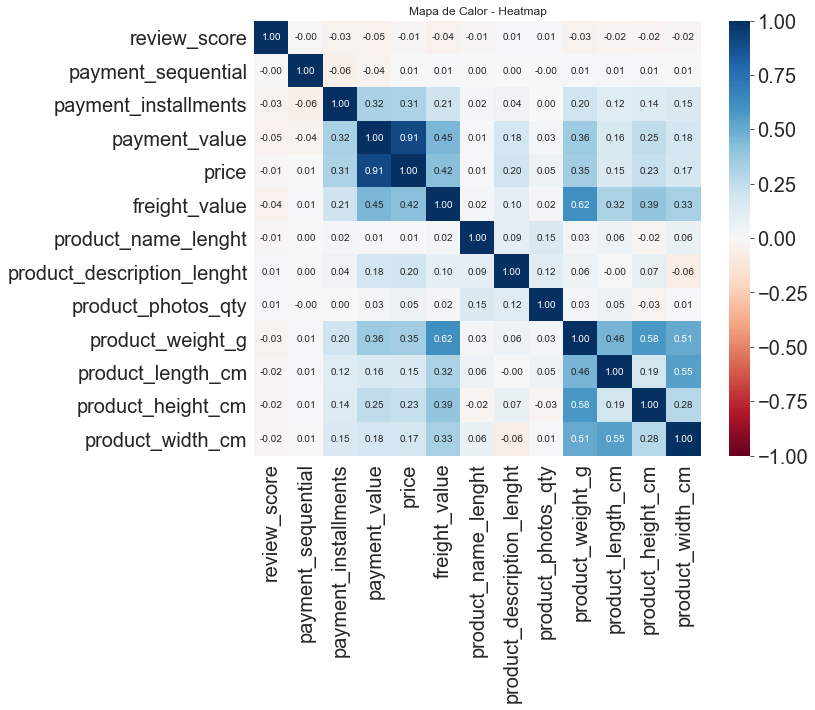

In [384]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', norm=plt.Normalize(-1,1), annot=True, fmt='.2f')
plt.title("Mapa de Calor - Heatmap")
plt.show()

<Figure size 432x288 with 0 Axes>

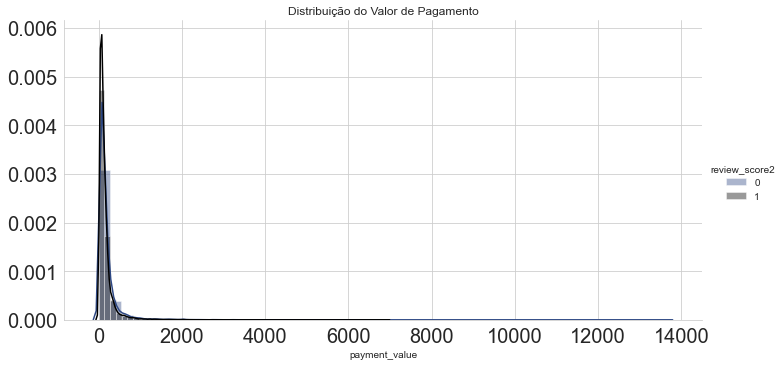

In [385]:
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score2", height=5,aspect=2.0,palette=['#2e4884','black'])
ax = ax.map(sns.distplot, "payment_value").add_legend();
plt.title('Distribuição do Valor de Pagamento')
plt.show()

<Figure size 432x288 with 0 Axes>

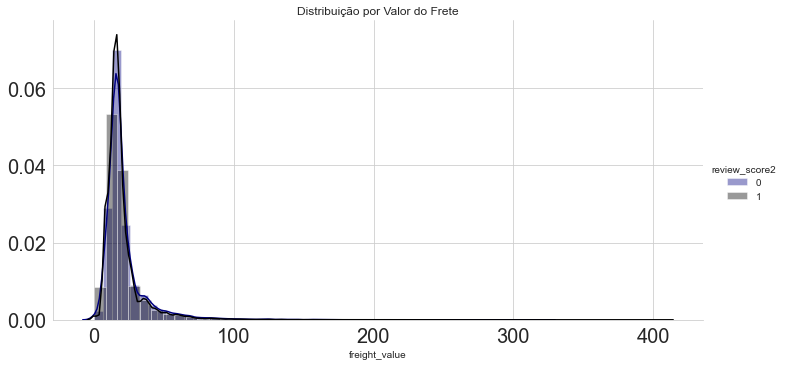

In [386]:
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score2", height=5,aspect=2.0,palette=['#000080','black'])
ax = ax.map(sns.distplot, "freight_value").add_legend();
plt.title('Distribuição por Valor do Frete')
plt.show()

<Figure size 432x288 with 0 Axes>

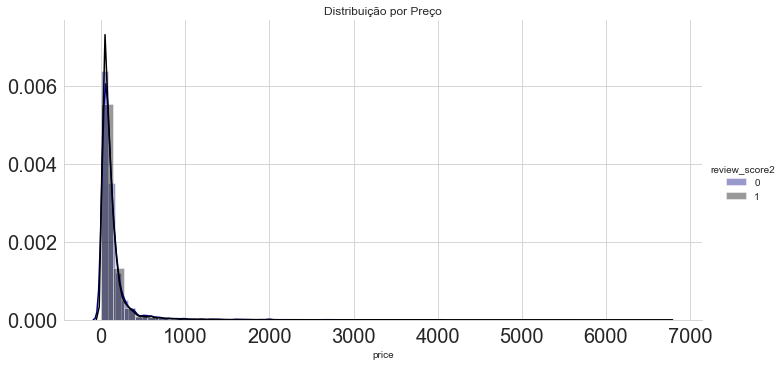

In [387]:
plt.figure()
sns.set_style("whitegrid")
ax = sns.FacetGrid(df, hue="review_score2", height=5,aspect=2.0,palette=['#000080','black'])
ax = ax.map(sns.distplot, "price").add_legend();
plt.title('Distribuição por Preço')
plt.show()

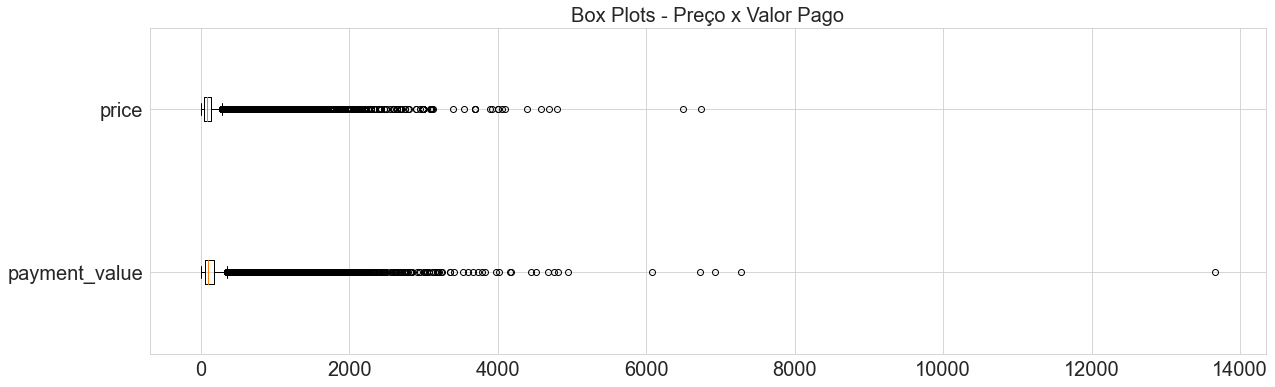

In [388]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,6))
 
box_plot_data=[df.payment_value,df.price]
plt.boxplot(box_plot_data,labels=['payment_value', 'price'],vert=False)
plt.title("Box Plots - Preço x Valor Pago", fontsize=20)
plt.show()

In [389]:
df['payment_value'].describe()

count    97055.00000
mean       157.77176
std        216.41082
min          0.01000
25%         60.01000
50%        103.13000
75%        175.28500
max      13664.08000
Name: payment_value, dtype: float64

In [390]:
df[df['price'] ==  6735]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao,review_score2,order_purchase_year_month
102172,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-03-03 14:23:18,2017-03-09,1,...,e2fbd9f0ef7b724c7ecb351601a857e7,5,sem_titulo,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41,housewares,Centro-Oeste,1,201702


In [391]:
df[df['payment_value'] ==  13664.08]

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,Regiao,review_score2,order_purchase_year_month
71012,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,delivered,2017-09-29 15:24:52,2017-10-17 18:22:29,2017-10-23,1,...,211fa81a22870cc634265ea85b751e40,1,sem_titulo,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39,fixed_telephony,Sudeste,0,201709


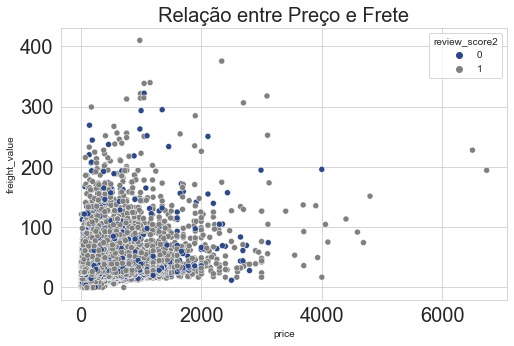

In [392]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='freight_value', data = df, hue="review_score2",palette=['#2e4884','grey'])
plt.title('Relação entre Preço e Frete', fontsize=20)
plt.show()

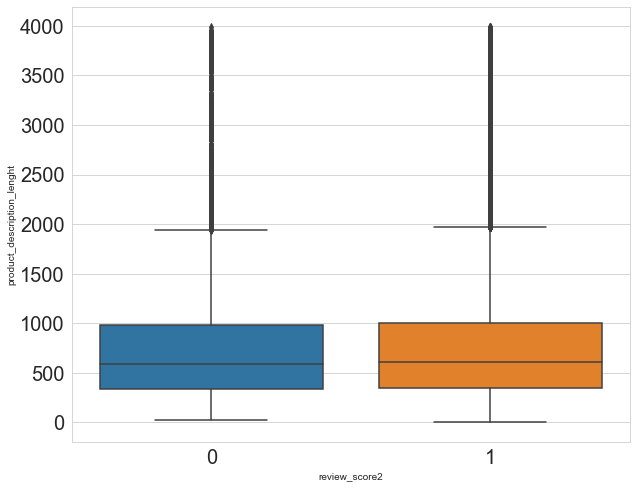

In [393]:
plt.figure(figsize=(10,8))
sns.boxplot(x='review_score2',y='product_description_lenght', data=df)
plt.show()

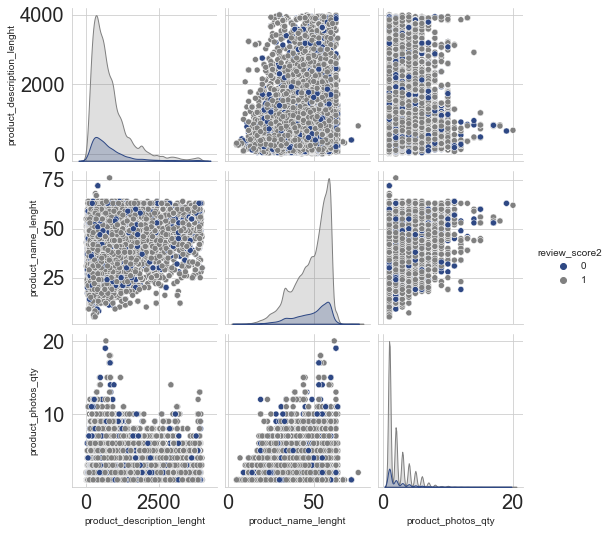

In [394]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
d = df[['product_description_lenght', 'product_name_lenght', 'product_photos_qty', 'review_score2']]
sns.set_style("whitegrid");
sns.pairplot(d, hue="review_score2", palette=['#2e4884','grey']);
plt.show()

In [395]:
#Tempo Estimado de Entrega
df["tempo_estimado"] = (df["order_estimated_delivery_date"]-df["order_purchase_timestamp"]).apply(
                                                                                     lambda x: x.total_seconds()/3600)

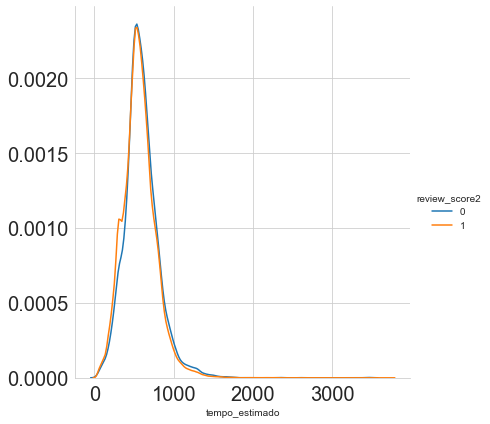

In [396]:
sns.FacetGrid(df,hue="review_score2",height=6)\
    .map(sns.kdeplot,"tempo_estimado")\
    .add_legend()
plt.show()

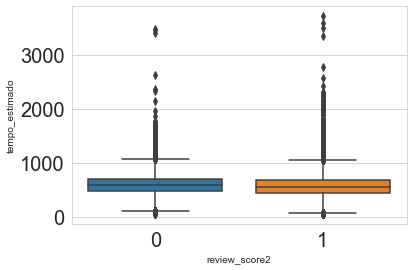

In [397]:
#boxplots
sns.boxplot(y="tempo_estimado",x="review_score2",data=df)
plt.show()

In [398]:
# Média do Tempo Estimado
print("Média \n",df.groupby("review_score2")["tempo_estimado"].mean())

#90 percentil do tempo estimado
print("90 percentil \n",df.groupby("review_score2")["tempo_estimado"].apply(lambda x: np.percentile(x,90)))

Média 
 review_score2
0    594.821880
1    566.833373
Name: tempo_estimado, dtype: float64
90 percentil 
 review_score2
0    847.320889
1    821.504972
Name: tempo_estimado, dtype: float64


In [399]:
# Diferença entre data da entrega e data estimada
df["diff_real_estimado"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).apply(
                                                                                     lambda x: x.total_seconds()/3600)

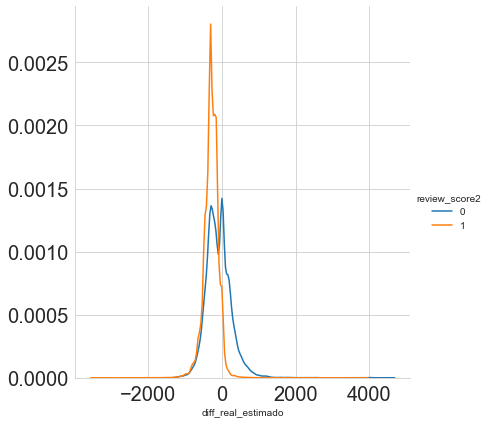

In [400]:
sns.FacetGrid(df,hue="review_score2",height=6)\
    .map(sns.kdeplot,"diff_real_estimado")\
    .add_legend()
plt.show()

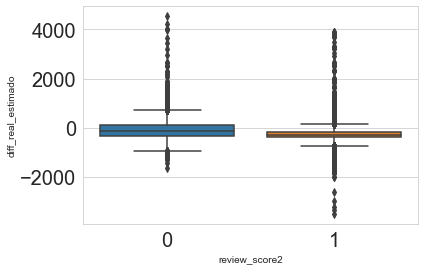

In [401]:
sns.boxplot(y="diff_real_estimado",x="review_score2",data=df)
plt.show()

In [402]:
#Média diferença Data Entrega x Estimada
print("Média \n",df.groupby("review_score2")["diff_real_estimado"].mean())
# Mediana 
print("Mediana \n",df.groupby("review_score2")["diff_real_estimado"].median())

Média 
 review_score2
0    -94.946263
1   -291.565496
Name: diff_real_estimado, dtype: float64
Mediana 
 review_score2
0   -128.285278
1   -292.103194
Name: diff_real_estimado, dtype: float64


# Pré - Processamento

In [403]:
df_comentarios = avaliacoes[['review_id', 'review_score', 'review_comment_title', 'review_comment_message']]

In [404]:
df_comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   review_score            99224 non-null  int64 
 2   review_comment_title    11568 non-null  object
 3   review_comment_message  40977 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [405]:
duplicados = round(sum(df_comentarios.duplicated("review_id"))/len(df_comentarios)*100, 2)
print(f"Reviews com id duplicado: {duplicados}%.")

Reviews com id duplicado: 0.82%.


In [406]:
df_comentarios[df_comentarios.duplicated("review_id", keep =  False)].sort_values(by = "review_id")

,review_id,review_score,review_comment_title,review_comment_message
46678,00130cbe1f9d422698c812ed8ded1919,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid..."
29841,00130cbe1f9d422698c812ed8ded1919,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid..."
90677,0115633a9c298b6a98bcbe4eee75345f,5,NaN,NaN
63193,0115633a9c298b6a98bcbe4eee75345f,5,NaN,NaN
92876,0174caf0ee5964646040cd94e15ac95e,1,NaN,Produto entregue dentro de embalagem do fornec...
...,...,...,...,...
31120,fe5c833752953fed3209646f1f63b53c,1,NaN,"Comprei dois produtos e ambos, mesmo enviados ..."
7870,ff2fc9e68f8aabfbe18d710b83aabd30,2,NaN,NaN
82521,ff2fc9e68f8aabfbe18d710b83aabd30,2,NaN,NaN
73951,ffb8cff872a625632ac983eb1f88843c,3,NaN,NaN


In [407]:
df_comentarios.drop_duplicates("review_id", inplace = True) # remove os duplicados

In [408]:
df_comentarios.fillna('', inplace = True) # para nao ter problemas com nulos na concatenacao

In [409]:
# concatenando as duas colunas
df_comentarios['review'] = df_comentarios['review_comment_title'] + ' ' + df_comentarios['review_comment_message']

In [410]:
# removendo entradas sem texto
df_comentarios = df_comentarios[df_comentarios['review'] != ' ']

In [411]:
df_comentarios['review_score'].value_counts()

5    21672
1     8723
4     6241
3     3615
2     2138
Name: review_score, dtype: int64

In [412]:
review_score2 = []

for score in df_comentarios['review_score']:
  if score > 3:
    review_score2.append(1)
  else:
    review_score2.append(0)

df_comentarios['review_score2'] = review_score2 # cria coluna (0 ou 1)

In [413]:
df_comentarios.shape

(42389, 6)

In [414]:
df_comentarios['review_length'] = df_comentarios['review_comment_message'].str.len()
df_comentarios[['review_score', 'review_length', 'review_comment_message']].head()

,review_score,review_length,review_comment_message
3,5,37,Recebi bem antes do prazo estipulado.
4,5,100,Parabéns lojas lannister adorei comprar pela I...
9,4,174,aparelho eficiente. no site a marca do aparelh...
12,4,45,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,56,"Vendedor confiável, produto ok e entrega antes..."


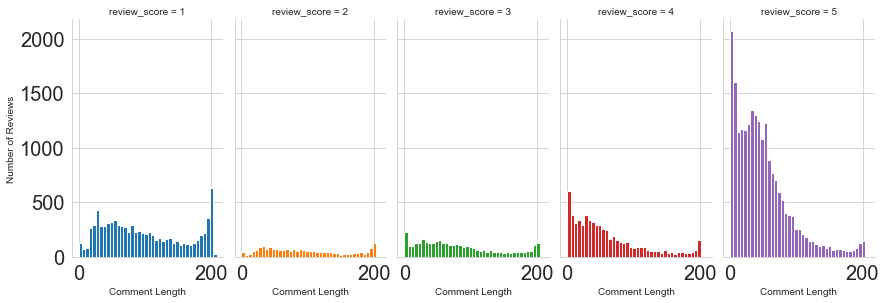

In [415]:
g = sns.FacetGrid(data=df_comentarios, col='review_score', hue='review_score')
g.map(plt.hist, 'review_length', bins=40)
g.set_xlabels('Comment Length')
g.set_ylabels('Number of Reviews')
plt.gcf().set_size_inches(12, 5)

<AxesSubplot:xlabel='review_score', ylabel='review_length'>

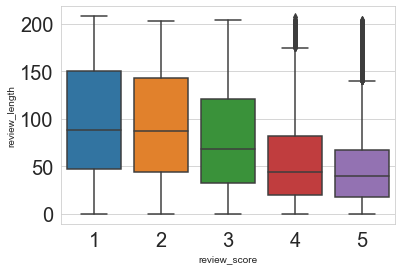

In [416]:
sns.boxplot(x='review_score', y='review_length', data=df_comentarios)

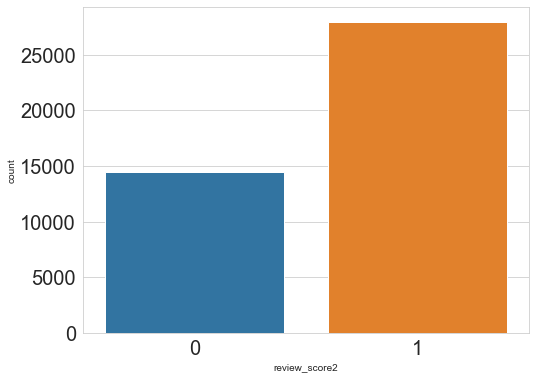

In [417]:
plt.figure(figsize=(8,6))
sns.countplot(df_comentarios['review_score2'])
plt.show()

In [418]:
df_comentarios['review_score2'].value_counts()

1    27913
0    14476
Name: review_score2, dtype: int64

In [419]:
df_comentarios.review_score2.value_counts(normalize=True)

1    0.658496
0    0.341504
Name: review_score2, dtype: float64

# Pré - Processamento do Texto

In [420]:
# Realizando download do pacote spacy
import spacy.cli
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [421]:
import re
import spacy

%matplotlib inline

In [422]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\augusto.queiroz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [423]:
# Importando pacote padrão de artigos/digitos
import pt_core_news_sm

spc_pt = pt_core_news_sm.load()

In [424]:
stopwords_pt = stopwords.words("portuguese")

In [425]:
stopwords_pt

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [426]:
stopwords_pt.remove('não')
stopwords_pt.remove('nem')

In [427]:
import pt_core_news_sm

spc_pt = pt_core_news_sm.load()

In [428]:
def limpa_texto(texto):
  '''(str) -> str
  Essa funcao recebe uma string, deixa tudo em minusculo, filtra apenas letras,
  retira stopwords, lemmatiza e retorna a string resultante.
  '''
  texto = texto.lower()

  texto = re.sub(r"[\W\d_]+", " ", texto)

  texto = [pal for pal in texto.split() if pal not in stopwords_pt]

  spc_texto = spc_pt(" ".join(texto))
  tokens = [word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in spc_texto]
  
  return " ".join(tokens)

In [429]:
df_comentarios['review'] = df_comentarios['review'].apply(limpa_texto)

In [430]:
df_comentarios.head()

,review_id,review_score,review_comment_title,review_comment_message,review,review_score2,review_length
3,e64fb393e7b32834bb789ff8bb30750e,5,,Recebi bem antes do prazo estipulado.,receber bem antar prazo estipular,1,37
4,f7c4243c7fe1938f181bec41a392bdeb,5,,Parabéns lojas lannister adorei comprar pela I...,parabém loja lannister adorar comprar internet...,1,100
9,8670d52e15e00043ae7de4c01cc2fe06,4,recomendo,aparelho eficiente. no site a marca do aparelh...,recomendar aparelhar eficiente site marcar apa...,1,174
12,4b49719c8a200003f700d3d986ea1a19,4,,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travar valor ta bom,1,45
15,3948b09f7c818e2d86c9a546758b2335,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",super recomendar vendedor confiável produto ok...,1,56


In [431]:
# Removendo reviews com apenas números ou símbolos
df_comentarios = df_comentarios[df_comentarios['review'] != '']

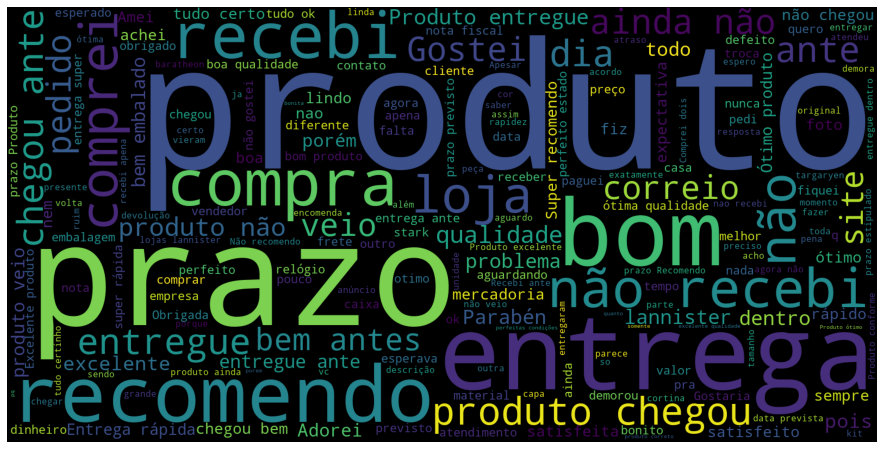

In [432]:
from wordcloud import WordCloud
stopwords = stopwords_pt
strings = df_comentarios['review_comment_message']
descricoes = (" ").join(strings)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,
                      height=800).generate(descricoes)
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [433]:
# Função para visualizarmos por avaliações positivas e negativas
def visualizar(label):
    words = ''
    for msg in df_comentarios[df_comentarios['review_score2'] == label]['review_comment_message']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

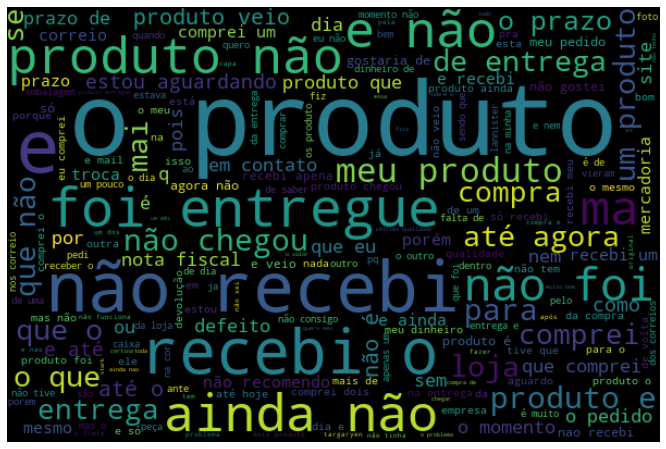

In [434]:
visualizar(0)

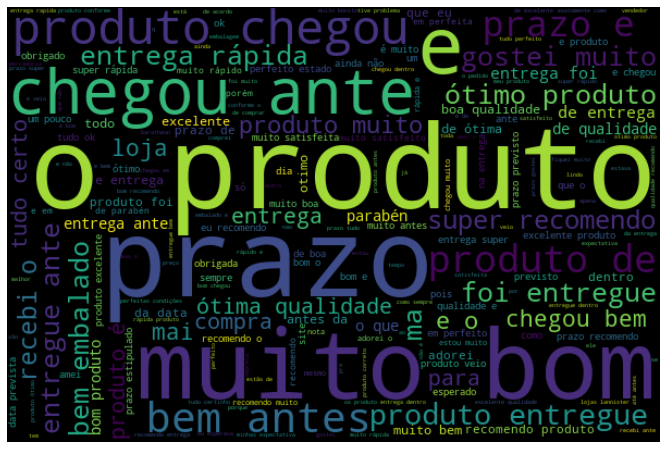

In [435]:
visualizar(1)

# Feature Extraction

## Bag Of Words

In [436]:
# Importando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [437]:
# Instanciando o CountVectorizer, binary=True faz a codificacao binaria
vectorizer = CountVectorizer(binary=True, max_features=5000)

texto = df_comentarios['review'] # cria vocabulário e retorna matriz

# Vetorizando o texto
vetor = vectorizer.fit_transform(texto)

In [438]:
vetor.toarray()

MemoryError: Unable to allocate 1.57 GiB for an array with shape (42129, 5000) and data type int64

In [441]:
print(vetor.shape, type(vetor))

(42129, 5000) <class 'scipy.sparse._csr.csr_matrix'>


## TF-IDF

In [442]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [443]:
# Instanciando o TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000)

# Vetorizando
X_tfidf = tfidf_vect.fit_transform(texto)

In [444]:
print(X_tfidf)

  (0, 1823)	0.6930177056918921
  (0, 3597)	0.3048175571469909
  (0, 265)	0.35176399570299943
  (0, 566)	0.42742269783440073
  (0, 3909)	0.34696490478938935
  (1, 3792)	0.47804524004616217
  (1, 1996)	0.3029462021004615
  (1, 4610)	0.21243382086082635
  (1, 3765)	0.32293166978730814
  (1, 4274)	0.33158891013788655
  (1, 2481)	0.31321616645316197
  (1, 990)	0.12920572662182003
  (1, 85)	0.2155938698061523
  (1, 2591)	0.20599253812401627
  (1, 2694)	0.16861743952728736
  (1, 3286)	0.4338066160001956
  (2, 4831)	0.18331435986076197
  (2, 1145)	0.16545919562477754
  (2, 437)	0.29694289849227196
  (2, 3078)	0.23712965840042508
  (2, 3245)	0.1463655562908813
  (2, 855)	0.09475570600360911
  (2, 2369)	0.2943491481058875
  (2, 2795)	0.4016532817254642
  (2, 4367)	0.14923461232750826
  :	:
  (42126, 829)	0.22615463521242182
  (42126, 3503)	0.16790018263406714
  (42126, 2753)	0.21990995669187538
  (42126, 132)	0.16342085336143933
  (42126, 2016)	0.15771659896794255
  (42126, 1700)	0.3396051196232

## Modelos

In [445]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score, roc_auc_score

In [446]:
# Dividir base de treino (70%) e teste (30%)
from sklearn.model_selection import train_test_split

In [447]:
x_train,x_test,y_train,y_test = train_test_split(vetor,df_comentarios['review_score2'], test_size=0.3, random_state = 10)
x2_train,x2_test,y2_train,y2_test = train_test_split(X_tfidf,df_comentarios['review_score2'], test_size=0.3, random_state = 10)

## Random Forest

In [448]:
from sklearn.ensemble import RandomForestClassifier

Texto Vetorizado com Bag of Words

In [449]:
rf_model = RandomForestClassifier(verbose = 1,n_jobs=5)

In [450]:
score_rf = cross_val_score(rf_model,x_train,y_train,cv=5)
rf_model.fit(x_train,y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   28.9s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.1s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   29.8s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.1s
[Parallel(n_jobs=5)]: Done 100

RandomForestClassifier(n_jobs=5, verbose=1)

In [451]:
#Validação cruzada
print(f'A média do Score é: {score_rf.mean()}')

A média do Score é: 0.8958290946083418


In [452]:
y_pred = rf_model.predict(x_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished


In [453]:
# Exibir as métricas no detalhe
def metricas(y_true, y_pred):
  ''' Função que recebe o y real, o y predito e mostra as principais metricas.'''
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nAUROC:", roc_auc_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))

In [454]:
metricas(y_test, y_pred)

Acurácia:  0.8912888677901732

AUROC: 0.8821332291930917

F1-Score: 0.8915475715860782


In [455]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4357
           1       0.92      0.91      0.92      8282

    accuracy                           0.89     12639
   macro avg       0.88      0.88      0.88     12639
weighted avg       0.89      0.89      0.89     12639



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.2s finished


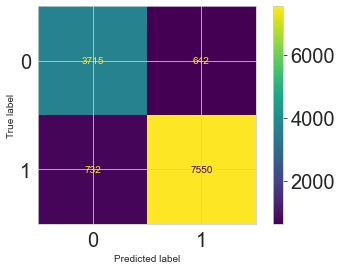

In [456]:
plot_confusion_matrix(rf_model,x_test,y_test)

Texto Vetorizado com Tf-idf

In [457]:
rf2_model = RandomForestClassifier(n_jobs=5,verbose=1)

In [458]:
score_rf2 = cross_val_score(rf2_model,x2_train,y2_train,cv=5)
rf2_model.fit(x2_train,y2_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.9s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   27.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   24.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 100

RandomForestClassifier(n_jobs=5, verbose=1)

In [459]:
print(f'A média do Score é: {score_rf2.mean()}')

A média do Score é: 0.8943370634113258


In [460]:
y2_pred = rf2_model.predict(x2_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished


In [461]:
metricas(y2_test, y2_pred)

Acurácia:  0.8912097476066144

AUROC: 0.882834260883166

F1-Score: 0.8915489536814353


In [462]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      4357
           1       0.92      0.91      0.92      8282

    accuracy                           0.89     12639
   macro avg       0.88      0.88      0.88     12639
weighted avg       0.89      0.89      0.89     12639



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished


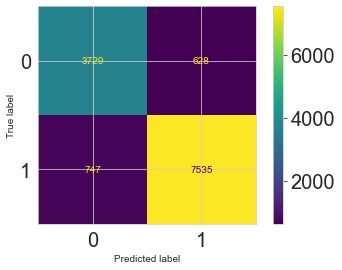

In [463]:
plot_confusion_matrix(rf2_model,x2_test,y2_test)

## Regressão Logística

In [464]:
from sklearn.linear_model import LogisticRegression

Bag of Words

In [465]:
lr_model = LogisticRegression(n_jobs=5,verbose=1)

In [466]:
score_lr = cross_val_score(lr_model,x_train,y_train,cv=5)
lr_model.fit(x_train,y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(n_jobs=5, verbose=1)

In [467]:
print(f'A média do Score é: {score_lr.mean()}')

A média do Score é: 0.8981349610037302


In [468]:
y_pred = lr_model.predict(x_test)

In [469]:
metricas(y_test, y_pred)

Acurácia:  0.8943745549489674

AUROC: 0.8780701884683785

F1-Score: 0.8938123494292888


In [470]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4357
           1       0.91      0.93      0.92      8282

    accuracy                           0.89     12639
   macro avg       0.89      0.88      0.88     12639
weighted avg       0.89      0.89      0.89     12639



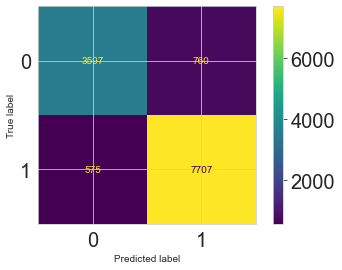

In [471]:
plot_confusion_matrix(lr_model,x_test,y_test)

TF-idf

In [472]:
lr2_model = LogisticRegression(n_jobs=5,verbose=1)

In [473]:
score_lr2 = cross_val_score(lr2_model,x2_train,y2_train,cv=5)
lr2_model.fit(x2_train,y2_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(n_jobs=5, verbose=1)

In [474]:
print(f'A média do Score é {score_lr2.mean()}')

A média do Score é 0.9013903017972194


In [475]:
y2_pred = lr2_model.predict(x2_test)

In [476]:
metricas(y2_test, y2_pred)

Acurácia:  0.897302001740644

AUROC: 0.8851442997656013

F1-Score: 0.8971774472699867


In [477]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4357
           1       0.92      0.92      0.92      8282

    accuracy                           0.90     12639
   macro avg       0.89      0.89      0.89     12639
weighted avg       0.90      0.90      0.90     12639



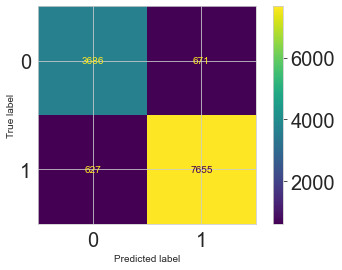

In [478]:
plot_confusion_matrix(lr2_model,x2_test,y2_test)

## Naive Bayes Multinomial

In [479]:
from sklearn.naive_bayes import MultinomialNB

Bag of Words

In [480]:
nbm_model = MultinomialNB()

In [481]:
score_nbm = cross_val_score(nbm_model,x_train,y_train,cv=5)
nbm_model.fit(x_train,y_train)

MultinomialNB()

In [482]:
print(f'A média do Score é: {score_nbm.mean()}')

A média do Score é: 0.8905052560189896


In [483]:
y_pred = nbm_model.predict(x_test)

In [484]:
metricas(y_test, y_pred)

Acurácia:  0.8892317430176438

AUROC: 0.880781103911317

F1-Score: 0.8895910610941562


In [485]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4357
           1       0.92      0.91      0.91      8282

    accuracy                           0.89     12639
   macro avg       0.88      0.88      0.88     12639
weighted avg       0.89      0.89      0.89     12639



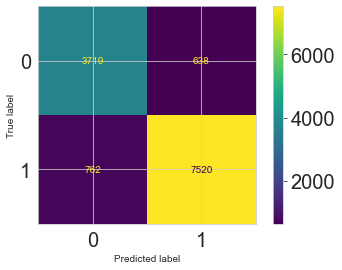

In [486]:
plot_confusion_matrix(nbm_model,x_test,y_test)

Tf-idf

In [487]:
nbm_model2 = MultinomialNB()

In [488]:
score_nbm2 = cross_val_score(nbm_model2,x2_train,y2_train,cv=5)
nbm_model2.fit(x2_train,y2_train)

MultinomialNB()

In [489]:
print(f'A média do Score é: {score_nbm2.mean()}')

A média do Score é: 0.890030518819939


In [490]:
y2_pred = nbm_model2.predict(x2_test)

In [491]:
metricas(y2_test, y2_pred)

Acurácia:  0.8893899833847615

AUROC: 0.8789983387407074

F1-Score: 0.8895438853451678


In [492]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4357
           1       0.92      0.91      0.92      8282

    accuracy                           0.89     12639
   macro avg       0.88      0.88      0.88     12639
weighted avg       0.89      0.89      0.89     12639



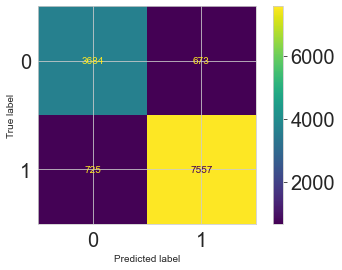

In [493]:
plot_confusion_matrix(nbm_model2,x2_test,y2_test)